In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
import urllib.request
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import clear_output
from os import listdir
from os.path import isfile, join

In [2]:
#import goodreads reviews
goodreads = pd.read_csv('books.csv', error_bad_lines=False)

goodreads.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
#identify the covers from the goodreads dataframe that still need to be downloaded
jpg_list = [f for f in listdir('cover_images\\') if isfile(join('cover_images\\', f))]

downloaded_images = pd.Series(list(map(int,[i[:-4] for i in jpg_list])))
download_list = goodreads[~goodreads['bookID'].isin(downloaded_images)]['bookID']

In [4]:
#used for tracking status
i=0

#downloads the cover for each book in the goodreads dataframe
for book_id in download_list:
    clear_output(wait=True)
    i += 1
    
    url = "https://www.goodreads.com/book/show/" + str(book_id)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')

    try:
        bk = soup.find(id="imagecol").find(class_="bookCoverPrimary").find('img')['src']
        urllib.request.urlretrieve(bk, "cover_images\\"+str(book_id)+".jpg")
        
        print("Current progress: "+ str(round((i / len(download_list))*100,2)) + "%")
    
    except AttributeError:
        print("Current progress: " + str(round((i / len(download_list))*100,2)),"%")

Current progress: 100.0 %


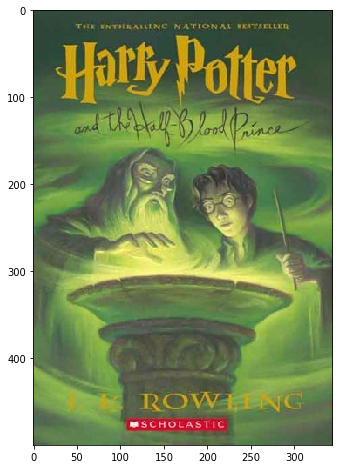

In [5]:
#sample image
pic=imageio.imread('cover_images/' + str(downloaded_images[0]) + '.jpg')
plt.figure(figsize=(12,8))

plt.imshow(pic)

In [6]:
#sample image attributes
print('Type of the image : ',type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Image Height {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))
print('Avg R: {}'.format(pic[:, :, 0].mean()))
print('Avg G: {}'.format(pic[:, :, 1].mean()))
print('Avg B: {}'.format(pic[:, :, 2].mean()))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (500, 344, 3)
Image Height 500
Image Width 344
Dimension of Image 3
Image size 516000
Maximum RGB value in this image 255
Minimum RGB value in this image 0
Avg R: 107.04043023255814
Avg G: 126.05446511627908
Avg B: 71.21158720930232


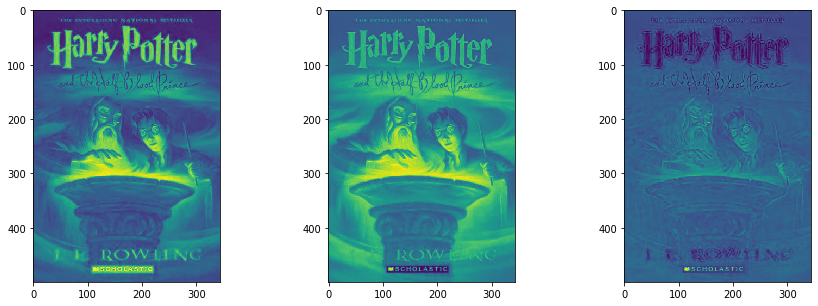

In [7]:
#sample RGB view
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 

for c, ax in zip(range(3), ax): 
    
    ax.imshow(pic[ : , : , c])

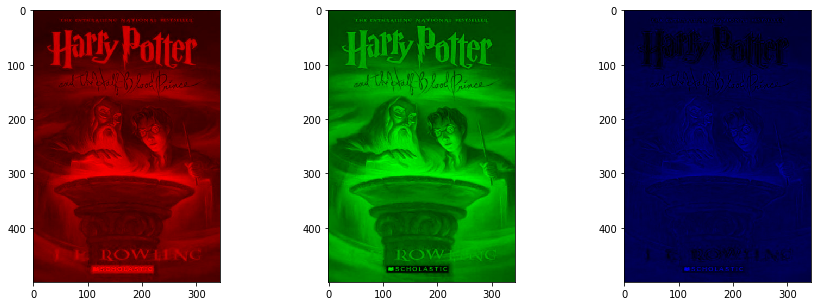

In [8]:
#sample split RGB view
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 

for c, ax in zip(range(3), ax): 
    
    split_img=np.zeros(pic.shape, dtype="uint8")# 'dtype' by default: 'numpy.float64' 

    split_img[:,:,c]=pic[:,:,c]

    ax.imshow(split_img)

In [9]:
#empty dataframe
pic_features = pd.DataFrame(columns=['Book ID', 'Pic Height', 'Pic Width', 'Pic Dimension', 'Pic Size', 'Avg R', 'Avg B', 'Avg G'])

#appends the features of each image
for image_name in downloaded_images:
    
    try:
        pic = imageio.imread('cover_images/' + str(image_name) + '.jpg')
    
    except ValueError:
        print(image_name)
        continue
    
    if pic.ndim == 3:
        df = pd.DataFrame({'bookID': [image_name], 'Pic Height': [pic.shape[0]], 'Pic Width': [pic.shape[1]], 
                           'Pic Dimension': [pic.ndim], 'Pic Size': [pic.size], 'Avg R':[pic[:, :, 0].mean()], 
                           'Avg B':[pic[:, :, 1].mean()], 'Avg G':[pic[:, :, 2].mean()]})
        pic_features = pic_features.append(df)

pic_features.sort_values('bookID', inplace=True)
pic_features.reset_index(inplace=True, drop=True)
pic_features.head()

4232


,Book ID,Pic Height,Pic Width,Pic Dimension,Pic Size,Avg R,Avg B,Avg G,bookID
0,NaN,500,344,3,516000,107.040430,126.054465,71.211587,1.0
1,NaN,400,276,3,331200,41.579783,106.870969,147.599348,2.0
2,NaN,475,317,3,451725,130.929205,99.876992,106.341856,4.0
3,NaN,475,290,3,413250,156.155521,136.207456,129.807376,5.0
4,NaN,263,318,3,250902,153.791843,153.128620,166.265658,8.0


In [10]:
#merges the goodreads reviews with the pic features
cover_df = goodreads.merge(pic_features, left_on='bookID', right_on='bookID', how='inner')
cover_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Book ID,Pic Height,Pic Width,Pic Dimension,Pic Size,Avg R,Avg B,Avg G
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN,500,344,3,516000,107.040430,126.054465,71.211587
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN,400,276,3,331200,41.579783,106.870969,147.599348
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,NaN,475,317,3,451725,130.929205,99.876992,106.341856
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN,475,290,3,413250,156.155521,136.207456,129.807376
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,NaN,263,318,3,250902,153.791843,153.128620,166.265658


In [11]:
cover_df['Aspect Ratio 1'] = cover_df['Pic Height'] / cover_df['Pic Width']
cover_df['Aspect Ratio 2'] = cover_df['Pic Width'] / cover_df['Pic Height']
cover_df['Aspect Ratio Max'] = cover_df[['Aspect Ratio 1', 'Aspect Ratio 2']].max(axis=1)

In [12]:
cover_df.shape

(10470, 23)

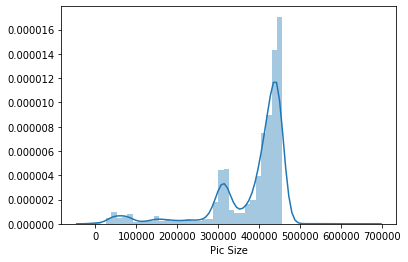

In [13]:
sns.distplot(cover_df['Pic Size'])

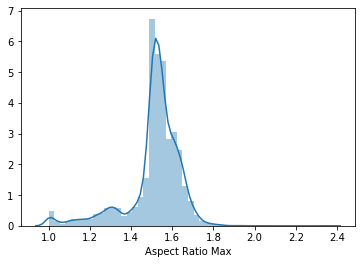

In [14]:
#number of covers in landscape orientation
sns.distplot(cover_df['Aspect Ratio Max'])

In [15]:
round(cover_df['Aspect Ratio Max'],1).value_counts()

1.5    4787
1.6    3141
1.7     724
1.3     589
1.4     549
1.2     276
1.0     180
1.1     154
1.8      63
1.9       5
2.4       1
2.0       1
Name: Aspect Ratio Max, dtype: int64

In [16]:
vc = cover_df['publisher'].value_counts()
vc[vc > 30]

Vintage                             304
Penguin Books                       246
Penguin Classics                    177
Mariner Books                       142
Ballantine Books                    136
                                   ... 
Scholastic                           33
Princeton University Press           32
Hackett Publishing Company  Inc.     31
Routledge                            31
Random House Audio                   31
Name: publisher, Length: 66, dtype: int64

In [17]:
api_book_ids = [i for i in range(1,60000) if i not in goodreads['bookID'].values]

In [18]:
import pandas as pd
import requests
print(requests.__version__)

2.23.0


In [19]:
key = "nTdCDLzKikDdVNVFKWu4g"


payload = {'key': key,
              'id': 1, 
          'format': 'json'}

# r = requests.get('https://www.goodreads.com/book/show', params=payload)

r = requests.get('https://www.goodreads.com/book/show.json?id=40171011&key=nTdCDLzKikDdVNVFKWu4g')
r.json()

{'reviews_widget': '<style>\n  #goodreads-widget {\n    font-family: georgia, serif;\n    padding: 18px 0;\n    width:565px;\n  }\n  #goodreads-widget h1 {\n    font-weight:normal;\n    font-size: 16px;\n    border-bottom: 1px solid #BBB596;\n    margin-bottom: 0;\n  }\n  #goodreads-widget a {\n    text-decoration: none;\n    color:#660;\n  }\n  iframe{\n    background-color: #fff;\n  }\n  #goodreads-widget a:hover { text-decoration: underline; }\n  #goodreads-widget a:active {\n    color:#660;\n  }\n  #gr_footer {\n    width: 100%;\n    border-top: 1px solid #BBB596;\n    text-align: right;\n  }\n  #goodreads-widget .gr_branding{\n    color: #382110;\n    font-size: 11px;\n    text-decoration: none;\n    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;\n  }\n</style>\n<div id="goodreads-widget">\n  <div id="gr_header"><h1><a rel="nofollow" href="https://www.goodreads.com/book/show/40171011-app-architecture">App Architecture Reviews</a></h1></div>\n  <iframe id="the_iframe"

In [20]:
r.content

b'{"reviews_widget":"\\u003cstyle\\u003e\\n  #goodreads-widget {\\n    font-family: georgia, serif;\\n    padding: 18px 0;\\n    width:565px;\\n  }\\n  #goodreads-widget h1 {\\n    font-weight:normal;\\n    font-size: 16px;\\n    border-bottom: 1px solid #BBB596;\\n    margin-bottom: 0;\\n  }\\n  #goodreads-widget a {\\n    text-decoration: none;\\n    color:#660;\\n  }\\n  iframe{\\n    background-color: #fff;\\n  }\\n  #goodreads-widget a:hover { text-decoration: underline; }\\n  #goodreads-widget a:active {\\n    color:#660;\\n  }\\n  #gr_footer {\\n    width: 100%;\\n    border-top: 1px solid #BBB596;\\n    text-align: right;\\n  }\\n  #goodreads-widget .gr_branding{\\n    color: #382110;\\n    font-size: 11px;\\n    text-decoration: none;\\n    font-family: \\"Helvetica Neue\\", Helvetica, Arial, sans-serif;\\n  }\\n\\u003c/style\\u003e\\n\\u003cdiv id=\\"goodreads-widget\\"\\u003e\\n  \\u003cdiv id=\\"gr_header\\"\\u003e\\u003ch1\\u003e\\u003ca rel=\\"nofollow\\" href=\\"https://

In [20]:
import xml.etree.ElementTree as ET
root = ET.fromstring(r.content)

for child in root.iter('average_rating'):
    print(child.tag, child.attrib)

average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}
average_rating {}


In [39]:
import xmltodict

data_dict = xmltodict.parse(r.content)
data_dict['GoodreadsResponse']

ExpatError: no element found: line 2, column 1091

In [ ]:
resp = requests.get(self.host+self.path, params=self.params)
if self.req_format == 'xml':
    data_dict = xmltodict.parse(resp.content)
    return data_dict['GoodreadsResponse']
elif self.req_format == 'json':
    return json.loads(resp.content)